# Import

In [ ]:
# Import Dataset
import pandas as pd
url = "https://github.com/lilitran208/Data/blob/main/ted_main.csv?raw=true"
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import re

# Clean Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [ ]:
# Đổi format số
pd.options.display.float_format = "{:.2f}".format

In [ ]:
df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.00,2550.00,2550.00,2550.00,2550.00,2550.00,2550.00
mean,191.56,826.51,1321927552.05,27.33,1.03,1343525265.75,1698297.48
std,282.32,374.01,119739059.70,9.56,0.21,94640090.80,2498479.37
min,2.00,135.00,74649600.00,0.00,1.00,1151367060.00,50443.00
25%,63.00,577.00,1257465600.00,23.00,1.00,1268462970.00,755792.75
50%,118.00,848.00,1333238400.00,28.00,1.00,1340935446.50,1124523.50
75%,221.75,1046.75,1412964000.00,33.00,1.00,1423432130.25,1700759.50
max,6404.00,5256.00,1503792000.00,72.00,5.00,1506092422.00,47227110.00


In [ ]:
df.sample()

In [ ]:
df.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [ ]:
# Fill NaN cho cột speaker_occupation
df['speaker_occupation'] = df['speaker_occupation'].fillna('Unknown')

In [ ]:
#Đổi định dạng thời gian cho 2 cột film_date và published_date
df['film_date'] = pd.to_datetime(df['film_date']*(10**9))
df['published_date'] = pd.to_datetime(df['published_date']*(10**9))

In [ ]:
# Thêm cột year, month và year_month của published_date
df['p_year'] = df['published_date'].dt.year
df['p_month'] = df['published_date'].dt.month
df['p_yearmonth'] = df['published_date'].dt.to_period('M')

# Thêm cột year, month và year_month của filmed_date
df['f_year'] = df['film_date'].dt.year
df['f_month'] = df['film_date'].dt.month
df['f_yearmonth'] = df['film_date'].dt.to_period('M')

In [ ]:
# Đổi duration sang phút
df['duration'] = round(df['duration']/60, 2)

In [ ]:
df[df['views'] == df['views'].max()]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,p_year,p_month,p_yearmonth,f_year,f_month,f_yearmonth
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.40,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,6,2006-06,2006,2,2006-02


In [ ]:
# drop cột không cần thiết
df.drop(columns=['url','description'],inplace=True)

In [ ]:
# Xếp lại thứ tự cột
df = df[['name', 'title', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date','f_year', 'f_month','f_yearmonth', 'published_date','p_year','p_month','p_yearmonth', 'comments', 'tags', 'languages', 'ratings', 'views']]
df.head()

,name,title,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,f_year,f_month,f_yearmonth,published_date,p_year,p_month,p_yearmonth,comments,tags,languages,ratings,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Ken Robinson,Author/educator,1,19.40,TED2006,2006-02-25,2006,2,2006-02,2006-06-27 00:11:00,2006,6,2006-06,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,Al Gore,Climate advocate,1,16.28,TED2006,2006-02-25,2006,2,2006-02,2006-06-27 00:11:00,2006,6,2006-06,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520
2,David Pogue: Simplicity sells,Simplicity sells,David Pogue,Technology columnist,1,21.43,TED2006,2006-02-24,2006,2,2006-02,2006-06-27 00:11:00,2006,6,2006-06,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,Majora Carter,Activist for environmental justice,1,18.60,TED2006,2006-02-26,2006,2,2006-02,2006-06-27 00:11:00,2006,6,2006-06,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,Hans Rosling,Global health expert; data visionary,1,19.83,TED2006,2006-02-22,2006,2,2006-02,2006-06-27 20:38:00,2006,6,2006-06,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869


In [ ]:
df['name'].duplicated().sum()

0

In [ ]:
print(df['film_date'].min())
print(df['film_date'].max())
print(df['published_date'].min())
print(df['published_date'].max())

1972-05-14 00:00:00
2017-08-27 00:00:00
2006-06-27 00:11:00
2017-09-22 15:00:22


# EDA

##Top 10 speakers xuất hiện nhiều nhất trên TED Talks

In [ ]:
# Top 10 speakers xuất hiện nhiều nhất trên TED Talks
df['main_speaker'].value_counts().head(10)

Hans Rosling            9
Juan Enriquez           7
Rives                   6
Marco Tempest           6
Clay Shirky             5
Nicholas Negroponte     5
Jacqueline Novogratz    5
Julian Treasure         5
Dan Ariely              5
Bill Gates              5
Name: main_speaker, dtype: int64

## Nghề nghiệp phổ biến nhất của speaker

In [ ]:
# Nghề nghiệp phổ biến nhất của speaker
soc = df['speaker_occupation'].value_counts().reset_index()
soc.columns = ['Occupation','Count']
soc

,Occupation,Count
0,Writer,45
1,Designer,34
2,Artist,34
3,Journalist,33
4,Entrepreneur,31
...,...,...
1454,"Broadcast personality, politician, author",1
1455,Art diagnostician,1
1456,Social investment visionary,1
1457,Percussionist,1


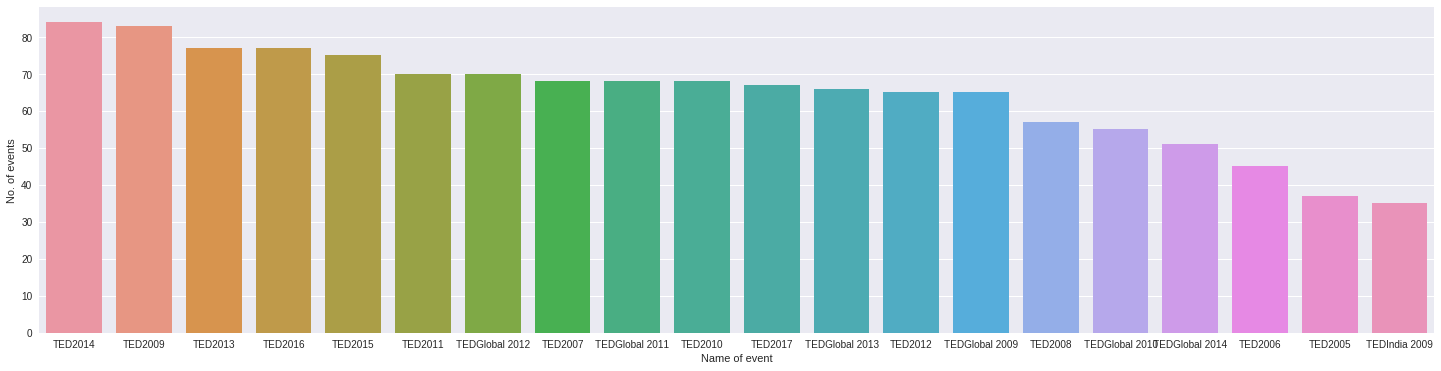

In [ ]:
# Những events tổ chức nhiều talks nhất
plt.figure(figsize=(25,6))
df1= df['event'].value_counts().head(20).reset_index()
sns.barplot(data=df1,x='index',y='event')
plt.xlabel('Name of event')
plt.ylabel('No. of events')
plt.show()

In [ ]:
df_s = df[['main_speaker','title','event','comments','views','languages','p_year']]

In [ ]:
top_views = df[['main_speaker','title','event','comments','views','languages','p_year']].sort_values('views',ascending=False).head(10)
top_views

,main_speaker,title,event,comments,views,languages,p_year
0,Ken Robinson,Do schools kill creativity?,TED2006,4553,47227110,60,2006
1346,Amy Cuddy,Your body language may shape who you are,TEDGlobal 2012,2290,43155405,51,2012
677,Simon Sinek,How great leaders inspire action,TEDxPuget Sound,1930,34309432,45,2010
837,Brené Brown,The power of vulnerability,TEDxHouston,1927,31168150,52,2010
452,Mary Roach,10 things you didn't know about orgasm,TED2009,354,22270883,37,2009
1776,Julian Treasure,How to speak so that people want to listen,TEDGlobal 2013,297,21594632,45,2014
201,Jill Bolte Taylor,My stroke of insight,TED2008,2877,21190883,49,2008
5,Tony Robbins,Why we do what we do,TED2006,672,20685401,36,2006
2114,James Veitch,This is what happens when you reply to spam email,TEDGlobal>Geneva,150,20475972,43,2016
1416,Cameron Russell,"Looks aren't everything. Believe me, I'm a model.",TEDxMidAtlantic,846,19787465,43,2013


In [ ]:
low_views = df[['main_speaker','title','event','comments','views','languages','p_year']].sort_values('views',ascending=True).head(10)
low_views

,main_speaker,title,event,comments,views,languages,p_year
594,Edwidge Danticat,Stories of Haiti,University of California,20,50443,0,2010
1112,Charles Hazlewood + British Paraorchestra,The debut of the British Paraorchestra,TEDxBrussels,43,66668,0,2012
237,Rokia Traore,"""Kounandi""",TEDGlobal 2007,43,82488,0,2008
776,Tim Birkhead,The early birdwatchers,The Do Lectures,40,112321,0,2010
1133,Aleph Molinari,Let's bridge the digital divide!,TEDxSanMigueldeAllende,80,115346,0,2012
1229,José Bowen,Beethoven the businessman,TEDxSMU,73,117756,0,2012
1141,Keith Nolan,Deaf in the military,TEDxIslay,70,120274,0,2012
1079,Leslie Dodson,Don't misrepresent Africa,TEDxBoulder 2011,84,121186,0,2011
1104,Nate Garvis,"Change our culture, change our world",TEDxTC,70,125050,0,2012
1178,Scott Summit,Beautiful artificial limbs,TEDxCambridge,84,132199,0,2012


In [ ]:
# Loc ra khoang tgian du data ca nam
full_data = df[(df['f_year'] > 2006) & (df['f_year'] < 2017)]

# So chuong trinh dc san xuat qua cac thang trong nam 2010
month_vid2010 = full_data[full_data['f_year'] == 2010].groupby('f_month')['title'].count().reset_index()
month_vid2010.columns=['Month', 'count']
month_vid2010

,Month,count
0,1,3
1,2,70
2,3,4
3,4,27
4,5,6
5,6,11
6,7,59
7,8,2
8,9,7
9,10,19


In [ ]:
# So chuong trinh dc san xuat qua cac thang trong nam 2007-2016
month_vid = full_data.groupby('f_month')['title'].count().reset_index()
month_vid.columns=['Month', 'count']
month_vid

,Month,count
0,1,30
1,2,413
2,3,379
3,4,105
4,5,121
5,6,268
6,7,223
7,8,26
8,9,105
9,10,207


In [ ]:
# Loc ra khoang tgian du data ca nam
full_data = df[(df['p_year'] > 2006) & (df['p_year'] < 2017)]

# So chuong trinh dc published qua cac thang trong nam 2010
month_pu2010 = full_data[full_data['p_year'] == 2010].groupby('p_month')['title'].count().reset_index()
month_pu2010.columns=['Month', 'count']

# So chuong trinh dc published qua cac thang trong nam 2007-2016
month_pu = full_data.groupby('p_month')['title'].count().reset_index()
month_pu.columns=['Month', 'count']
month_pu

#merge
month_pu_merge = pd.merge(month_pu,month_pu2010,how='inner',on='Month')
month_pu_merge

,Month,count_x,count_y
0,1,195,26
1,2,182,18
2,3,202,26
3,4,234,24
4,5,207,22
5,6,203,23
6,7,181,21
7,8,138,15
8,9,203,24
9,10,213,21


# Lọc Tags

In [ ]:
df_tags=df[['name','main_speaker']].reset_index()
df_tags = df_tags.drop(columns=['index'])
df_tags['Year'] = df['published_date'].dt.year
df_tags['Month'] = df['published_date'].dt.month
df_tags

,name,main_speaker,Year,Month
0,Ken Robinson: Do schools kill creativity?,Ken Robinson,2006,6
1,Al Gore: Averting the climate crisis,Al Gore,2006,6
2,David Pogue: Simplicity sells,David Pogue,2006,6
3,Majora Carter: Greening the ghetto,Majora Carter,2006,6
4,Hans Rosling: The best stats you've ever seen,Hans Rosling,2006,6
...,...,...,...,...
2545,Duarte Geraldino: What we're missing in the de...,Duarte Geraldino,2017,9
2546,Armando Azua-Bustos: The most Martian place on...,Armando Azua-Bustos,2017,9
2547,Radhika Nagpal: What intelligent machines can ...,Radhika Nagpal,2017,9
2548,Theo E.J. Wilson: A black man goes undercover ...,Theo E.J. Wilson,2017,9


In [ ]:
#Hàm đổi String thành Dummies
def get_tags(t):
  k=re.findall(r'[\w]+',t['tags'])
  x=pd.get_dummies(k)
  return x
#Gán Dummies vào collumn all_tags 
df['all_tags'] = df.apply(get_tags, axis=1)
c=df['tags'].count()
#Từ từng all_tags lấy giá trị và tạo cột theo từng tags trong Dummies
for i in range(c) :
  k=re.findall(r'[\w]+',df.loc[i]['tags'])
  for j in k :
     df_tags.loc[i,j]=df.loc[i]['all_tags'][j].sum()

df_tags=df_tags.rename(columns={'main_speaker':'Speaker','name':'Title Name'})


In [ ]:
#Lọc Tags theo năm
table_1=df_tags.groupby(['Year']).count().reset_index().reset_index()
table_1 = table_1.drop(columns=['Speaker','Month','index'])
table_1=table_1.rename(columns={'Title Name':'No.Events'})
table_1


,Year,No.Events,children,creativity,culture,dance,education,parenting,teaching,alternative,energy,cars,climate,change,environment,global,issues,science,sustainability,technology,computers,entertainment,interface,design,media,music,performance,simplicity,software,MacArthur,grant,activism,business,cities,green,inequality,politics,pollution,Africa,Asia,...,printing,Guns,conservation,immigration,Criminal,Justice,Ed,privacy,microbes,machine,learning,skateboarding,augmented,forensics,painting,pandemic,meditation,mindfulness,Syria,Transgender,testing,Debate,farming,cloud,Books,television,street,Addiction,CRISPR,vulnerability,capitalism,refugees,grammar,discovery,blockchain,TEDNYC,Residency,biosphere,epidemiology,funny
0,2006,50,2,3,33,2,2,1,1,3,3,1,3,8,4,18,17,17,1,16,1,12,2,10,4,4,7,2,3,2,2,4,16,3,1,1,2,2,3,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007,122,2,5,51,2,4,3,0,4,7,3,8,15,10,41,41,34,4,54,3,32,1,37,3,14,17,1,4,4,4,3,30,9,2,1,0,0,16,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2008,188,13,13,49,1,18,4,2,2,5,3,2,9,4,52,52,54,3,76,7,61,2,56,14,22,12,1,2,4,4,12,31,10,6,1,7,2,17,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2009,222,14,25,40,3,12,0,0,5,11,2,9,21,21,52,49,55,9,79,8,34,1,58,10,17,14,0,1,1,1,9,40,14,10,2,19,1,9,9,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2010,257,18,15,47,3,24,0,3,1,6,0,4,17,19,53,49,63,6,64,10,29,4,47,5,18,17,5,0,0,0,6,47,15,18,2,14,1,7,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2011,261,6,22,90,1,12,1,1,1,4,3,0,8,4,56,56,79,3,86,10,44,0,57,11,14,7,2,1,1,1,9,35,12,6,2,14,0,3,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2012,306,10,17,62,2,11,3,1,12,14,2,13,24,23,67,65,78,15,85,15,31,5,44,14,15,9,2,8,0,0,17,34,13,7,2,16,7,4,4,...,1,1,4,1,1,1,8,1,2,3,3,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2013,244,15,15,53,3,20,6,8,1,7,3,6,16,10,48,47,34,9,63,8,20,2,29,5,7,7,0,2,0,0,8,28,8,4,6,9,2,11,4,...,1,0,5,0,0,0,1,1,2,0,0,0,0,0,1,1,1,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2014,240,6,13,23,3,7,2,3,1,3,0,4,14,3,30,30,29,6,42,9,10,4,19,8,11,5,0,4,0,0,13,28,11,2,7,9,1,3,0,...,1,1,0,0,0,0,0,4,2,2,2,0,0,0,0,0,1,1,1,2,0,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2015,220,4,17,17,1,8,1,1,0,3,1,7,23,12,27,26,37,5,39,5,6,1,25,7,9,7,0,5,0,0,17,14,8,3,17,7,3,2,1,...,0,1,2,4,2,2,0,3,2,2,2,0,0,1,0,0,1,1,2,2,0,0,1,0,8,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
table_1.drop(columns=['Year','No.Events'],inplace=True)
table_1

,children,creativity,culture,dance,education,parenting,teaching,alternative,energy,cars,climate,change,environment,global,issues,science,sustainability,technology,computers,entertainment,interface,design,media,music,performance,simplicity,software,MacArthur,grant,activism,business,cities,green,inequality,politics,pollution,Africa,Asia,Google,demo,...,printing,Guns,conservation,immigration,Criminal,Justice,Ed,privacy,microbes,machine,learning,skateboarding,augmented,forensics,painting,pandemic,meditation,mindfulness,Syria,Transgender,testing,Debate,farming,cloud,Books,television,street,Addiction,CRISPR,vulnerability,capitalism,refugees,grammar,discovery,blockchain,TEDNYC,Residency,biosphere,epidemiology,funny
0,2,3,33,2,2,1,1,3,3,1,3,8,4,18,17,17,1,16,1,12,2,10,4,4,7,2,3,2,2,4,16,3,1,1,2,2,3,1,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,5,51,2,4,3,0,4,7,3,8,15,10,41,41,34,4,54,3,32,1,37,3,14,17,1,4,4,4,3,30,9,2,1,0,0,16,1,2,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,13,13,49,1,18,4,2,2,5,3,2,9,4,52,52,54,3,76,7,61,2,56,14,22,12,1,2,4,4,12,31,10,6,1,7,2,17,1,2,11,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14,25,40,3,12,0,0,5,11,2,9,21,21,52,49,55,9,79,8,34,1,58,10,17,14,0,1,1,1,9,40,14,10,2,19,1,9,9,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18,15,47,3,24,0,3,1,6,0,4,17,19,53,49,63,6,64,10,29,4,47,5,18,17,5,0,0,0,6,47,15,18,2,14,1,7,1,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,22,90,1,12,1,1,1,4,3,0,8,4,56,56,79,3,86,10,44,0,57,11,14,7,2,1,1,1,9,35,12,6,2,14,0,3,3,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,10,17,62,2,11,3,1,12,14,2,13,24,23,67,65,78,15,85,15,31,5,44,14,15,9,2,8,0,0,17,34,13,7,2,16,7,4,4,0,3,...,1,1,4,1,1,1,8,1,2,3,3,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,15,15,53,3,20,6,8,1,7,3,6,16,10,48,47,34,9,63,8,20,2,29,5,7,7,0,2,0,0,8,28,8,4,6,9,2,11,4,0,4,...,1,0,5,0,0,0,1,1,2,0,0,0,0,0,1,1,1,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,6,13,23,3,7,2,3,1,3,0,4,14,3,30,30,29,6,42,9,10,4,19,8,11,5,0,4,0,0,13,28,11,2,7,9,1,3,0,1,3,...,1,1,0,0,0,0,0,4,2,2,2,0,0,0,0,0,1,1,1,2,0,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,4,17,17,1,8,1,1,0,3,1,7,23,12,27,26,37,5,39,5,6,1,25,7,9,7,0,5,0,0,17,14,8,3,17,7,3,2,1,2,6,...,0,1,2,4,2,2,0,3,2,2,2,0,0,1,0,0,1,1,2,2,0,0,1,0,8,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
table_1 =table_1.sum().reset_index()
table_1

,index,0
0,children,143
1,creativity,189
2,culture,486
3,dance,25
4,education,153
...,...,...
444,TEDNYC,19
445,Residency,6
446,biosphere,7
447,epidemiology,3


In [ ]:
# lấy tag 2010
tag_2010 = table_1[table_1['Year']==2010]
tag_2010.drop(columns=['Year','No.Events'],inplace=True)
tag_2010 = tag_2010.T.reset_index()
tag_2010.columns = ['Tag','Total']
tag_2010

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Tag,Total
0,children,18
1,creativity,15
2,culture,47
3,dance,3
4,education,24
...,...,...
444,TEDNYC,0
445,Residency,0
446,biosphere,0
447,epidemiology,0


# Lọc Rating

In [ ]:
# Lấy năm tháng trong published_date
df_rating=df[['name','ratings']]
df_rating.loc[:,'Year'] = df.loc[:,'published_date'].dt.year
df_rating.loc[:,'Month'] = df.loc[:,'published_date'].dt.month
df_rating

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,name,ratings,Year,Month
0,Ken Robinson: Do schools kill creativity?,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",2006,6
1,Al Gore: Averting the climate crisis,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",2006,6
2,David Pogue: Simplicity sells,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",2006,6
3,Majora Carter: Greening the ghetto,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",2006,6
4,Hans Rosling: The best stats you've ever seen,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",2006,6
...,...,...,...,...
2545,Duarte Geraldino: What we're missing in the de...,"[{'id': 3, 'name': 'Courageous', 'count': 24},...",2017,9
2546,Armando Azua-Bustos: The most Martian place on...,"[{'id': 22, 'name': 'Fascinating', 'count': 32...",2017,9
2547,Radhika Nagpal: What intelligent machines can ...,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...",2017,9
2548,Theo E.J. Wilson: A black man goes undercover ...,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...",2017,9


In [ ]:
# Lấy rating theo Title
rating_count=pd.json_normalize(eval(df_rating['ratings'][0]))
rating_count['Title']=df_rating['name'][0]
b=pd.pivot_table(data=rating_count,
               index='Title',
               columns='name',
               values='count',
               aggfunc='sum')
for i in range(1,2550) :
  rating_count=pd.json_normalize(eval(df_rating['ratings'][i]))
  rating_count['Title']=df_rating['name'][i]
  a=pd.pivot_table(data=rating_count,
               index='Title',
               columns='name',
               values='count',
               aggfunc='sum')
  
  b = pd.concat([b, a], axis=0)
b

name,Beautiful,Confusing,Courageous,Fascinating,Funny,Informative,Ingenious,Inspiring,Jaw-dropping,Longwinded,OK,Obnoxious,Persuasive,Unconvincing
Title,,,,,,,,,,,,,,
Ken Robinson: Do schools kill creativity?,4573,242,3253,10581,19645,7346,6073,24924,4439,387,1174,209,10704,300
Al Gore: Averting the climate crisis,58,62,139,132,544,443,56,413,116,113,203,131,268,258
David Pogue: Simplicity sells,60,27,45,166,964,395,183,230,54,78,146,142,230,104
Majora Carter: Greening the ghetto,291,32,760,132,59,380,105,1070,230,53,85,35,460,36
Hans Rosling: The best stats you've ever seen,942,72,318,4606,1390,5433,3202,2893,3736,110,248,61,2542,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Duarte Geraldino: What we're missing in the debate about immigration,21,2,24,8,1,33,22,27,14,3,0,1,24,12
Armando Azua-Bustos: The most Martian place on Earth,4,0,2,32,20,38,6,20,8,0,13,0,7,1
Radhika Nagpal: What intelligent machines can learn from a school of fish,14,5,2,24,1,32,19,30,1,0,4,0,3,1


In [ ]:
#Lấy tháng năm kết hợp với rating
full=df_rating.set_index('name')
full = pd.concat([full, b], axis=1)
full=full.reset_index()
full=full.rename(columns={'index':'Title'})
full

,Title,ratings,Year,Month,Beautiful,Confusing,Courageous,Fascinating,Funny,Informative,Ingenious,Inspiring,Jaw-dropping,Longwinded,OK,Obnoxious,Persuasive,Unconvincing
0,Ken Robinson: Do schools kill creativity?,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",2006,6,4573,242,3253,10581,19645,7346,6073,24924,4439,387,1174,209,10704,300
1,Al Gore: Averting the climate crisis,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",2006,6,58,62,139,132,544,443,56,413,116,113,203,131,268,258
2,David Pogue: Simplicity sells,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",2006,6,60,27,45,166,964,395,183,230,54,78,146,142,230,104
3,Majora Carter: Greening the ghetto,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",2006,6,291,32,760,132,59,380,105,1070,230,53,85,35,460,36
4,Hans Rosling: The best stats you've ever seen,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",2006,6,942,72,318,4606,1390,5433,3202,2893,3736,110,248,61,2542,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,Duarte Geraldino: What we're missing in the de...,"[{'id': 3, 'name': 'Courageous', 'count': 24},...",2017,9,21,2,24,8,1,33,22,27,14,3,0,1,24,12
2546,Armando Azua-Bustos: The most Martian place on...,"[{'id': 22, 'name': 'Fascinating', 'count': 32...",2017,9,4,0,2,32,20,38,6,20,8,0,13,0,7,1
2547,Radhika Nagpal: What intelligent machines can ...,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...",2017,9,14,5,2,24,1,32,19,30,1,0,4,0,3,1
2548,Theo E.J. Wilson: A black man goes undercover ...,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...",2017,9,21,1,107,39,63,75,37,147,7,3,5,7,65,6


In [ ]:
#Thay đổi tags theo tháng năm
table_3 = full.drop(columns=['ratings'])
table_3

,Title,Year,Month,Beautiful,Confusing,Courageous,Fascinating,Funny,Informative,Ingenious,Inspiring,Jaw-dropping,Longwinded,OK,Obnoxious,Persuasive,Unconvincing
0,Ken Robinson: Do schools kill creativity?,2006,6,4573,242,3253,10581,19645,7346,6073,24924,4439,387,1174,209,10704,300
1,Al Gore: Averting the climate crisis,2006,6,58,62,139,132,544,443,56,413,116,113,203,131,268,258
2,David Pogue: Simplicity sells,2006,6,60,27,45,166,964,395,183,230,54,78,146,142,230,104
3,Majora Carter: Greening the ghetto,2006,6,291,32,760,132,59,380,105,1070,230,53,85,35,460,36
4,Hans Rosling: The best stats you've ever seen,2006,6,942,72,318,4606,1390,5433,3202,2893,3736,110,248,61,2542,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,Duarte Geraldino: What we're missing in the de...,2017,9,21,2,24,8,1,33,22,27,14,3,0,1,24,12
2546,Armando Azua-Bustos: The most Martian place on...,2017,9,4,0,2,32,20,38,6,20,8,0,13,0,7,1
2547,Radhika Nagpal: What intelligent machines can ...,2017,9,14,5,2,24,1,32,19,30,1,0,4,0,3,1
2548,Theo E.J. Wilson: A black man goes undercover ...,2017,9,21,1,107,39,63,75,37,147,7,3,5,7,65,6


In [ ]:
rating_2010 = table_3[table_3['Year']==2010].groupby(['Year']).sum()
rating_2010 = rating_2010.drop(columns='Month').T
rating_2010.reset_index(inplace=True)
rating_2010.columns=['Rating','Total']
rating_2010

,Rating,Total
0,Beautiful,47871
1,Confusing,5656
2,Courageous,50789
3,Fascinating,89175
4,Funny,53547
5,Informative,98510
6,Ingenious,49118
7,Inspiring,181184
8,Jaw-dropping,41659
9,Longwinded,10060


# Lưu file csv

In [ ]:
# Connect to Google Sheets
!pip install --upgrade oauth2client gspread

  Attempting uninstall: gspread
    Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


In [ ]:
# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import set_with_dataframe

Create new spreadsheet, this step is only ran in the first time exporting data to gsheet.

In [ ]:
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
# Authorize Google Sheets API
gc = gspread.authorize(GoogleCredentials.get_application_default())

# Create a new Google Spreadsheets
sh = gc.create('TED_talks')

In [ ]:
# ❗️ Note that before export data, you have to create the empty sheets in the Google Sheet first
def export_data(gsheet_key, worksheet_id, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                   For example: https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
                   Key is 1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA
       worksheet_id (int): 0, 1, 2, ... 
       data (DataFrame): data to write
    """
    sh = gc.open_by_key(gsheet_key)
    worksheet = sh.get_worksheet(worksheet_id)
    set_with_dataframe(worksheet, data)

In [ ]:
export_data('1IIG-KTNAGicvEQZkriNL9FW7D9OV23_fJFhs_QAJ1XI', 0, df)

In [ ]:
export_data('1IIG-KTNAGicvEQZkriNL9FW7D9OV23_fJFhs_QAJ1XI', 1, top_views)

In [ ]:
export_data('1IIG-KTNAGicvEQZkriNL9FW7D9OV23_fJFhs_QAJ1XI', 2, low_views)

In [ ]:
export_data('1IIG-KTNAGicvEQZkriNL9FW7D9OV23_fJFhs_QAJ1XI', 3, rating_2010)

In [ ]:
export_data('1IIG-KTNAGicvEQZkriNL9FW7D9OV23_fJFhs_QAJ1XI', 4, df_s)

In [ ]:
export_data('1IIG-KTNAGicvEQZkriNL9FW7D9OV23_fJFhs_QAJ1XI', 5, tag_2010)

In [ ]:
export_data('1IIG-KTNAGicvEQZkriNL9FW7D9OV23_fJFhs_QAJ1XI', 6, month_vid)
export_data('1IIG-KTNAGicvEQZkriNL9FW7D9OV23_fJFhs_QAJ1XI', 7, month_vid2010)

In [ ]:
export_data('1IIG-KTNAGicvEQZkriNL9FW7D9OV23_fJFhs_QAJ1XI', 8, month_pu_merge)

In [ ]:
export_data('1IIG-KTNAGicvEQZkriNL9FW7D9OV23_fJFhs_QAJ1XI', 9, table_1)